In [0]:
from __future__ import division
from sklearn import datasets
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import scale

In [0]:
wine = datasets.load_wine()

In [3]:
features = wine.data
labels = wine.target
df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
df["target"] = wine["target"]

print(df.shape)
df.info()
df.head()

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [0]:
#EDA
# features_pd=pd.DataFrame(features,columns=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
# print(features_pd.shape)
# labels_pd=pd.DataFrame(labels,columns=['Target'])
# print(labels_pd.shape)
# result = pd.concat([features_pd, labels_pd], axis = 1)
# print(result.shape)
# result.info()
# result.head()

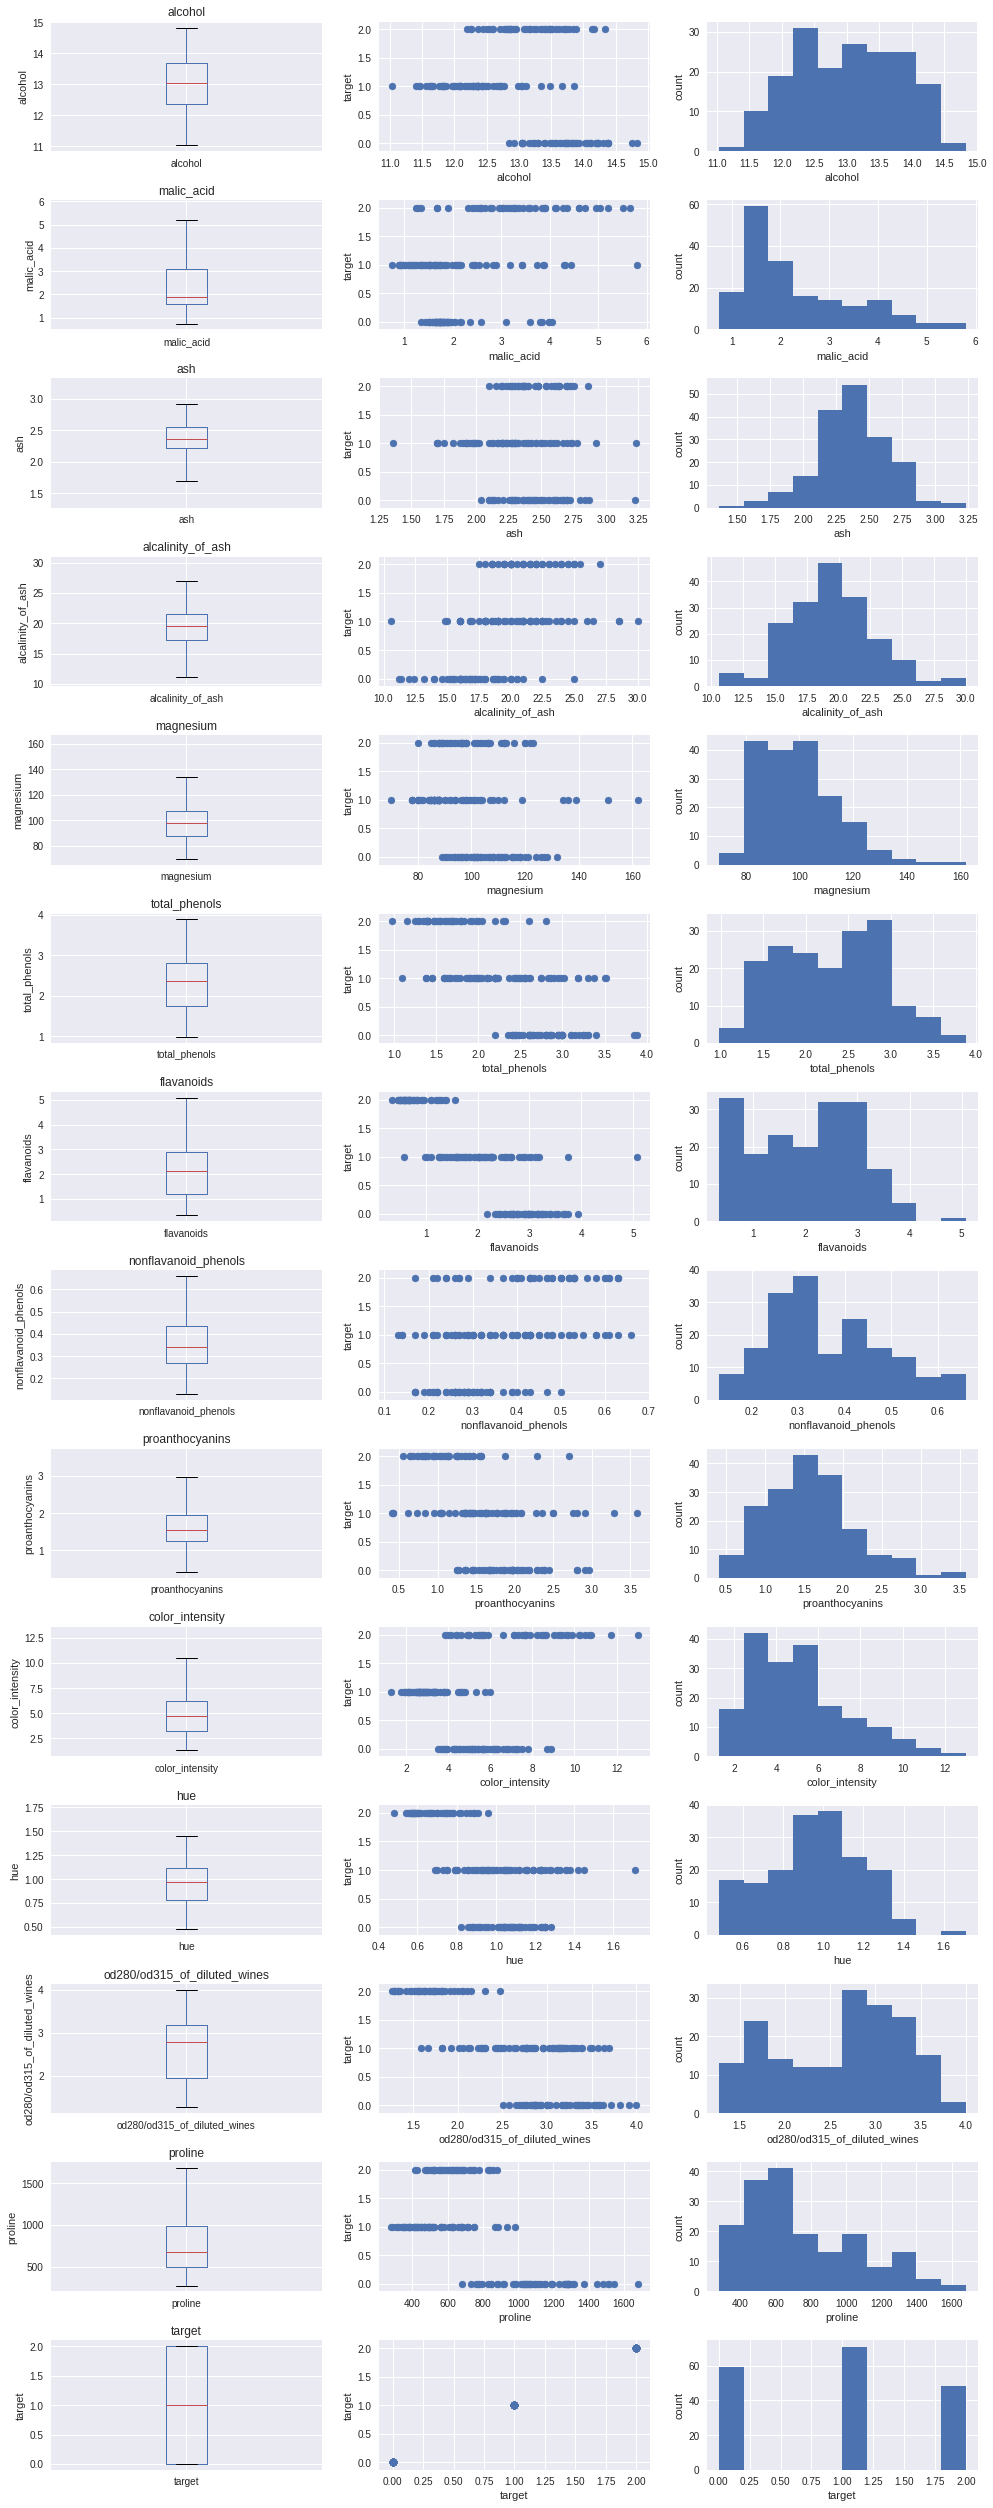

In [4]:
nrows = 14
ncols = 3
a=1

plt.figure(figsize=(14,35))

for col in df.columns:
#      print(df[col].describe())    
    plt.subplot(nrows,ncols,a)
    df.boxplot(col)
    plt.ylabel(col)
    plt.title(col)

    plt.subplot(nrows,ncols,a+1)
    plt.scatter(df[col], df['target'])
    plt.xlabel(col)
    plt.ylabel('target')
#     plt.title(col)

    plt.subplot(nrows,ncols,a+2)
    df[col].hist()
    plt.xlabel(col)
    plt.ylabel('count')
#     plt.title(col)
        
    a+=3
plt.tight_layout()
plt.show()

In [5]:
df.corr()['target']

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
target                          1.000000
Name: target, dtype: float64

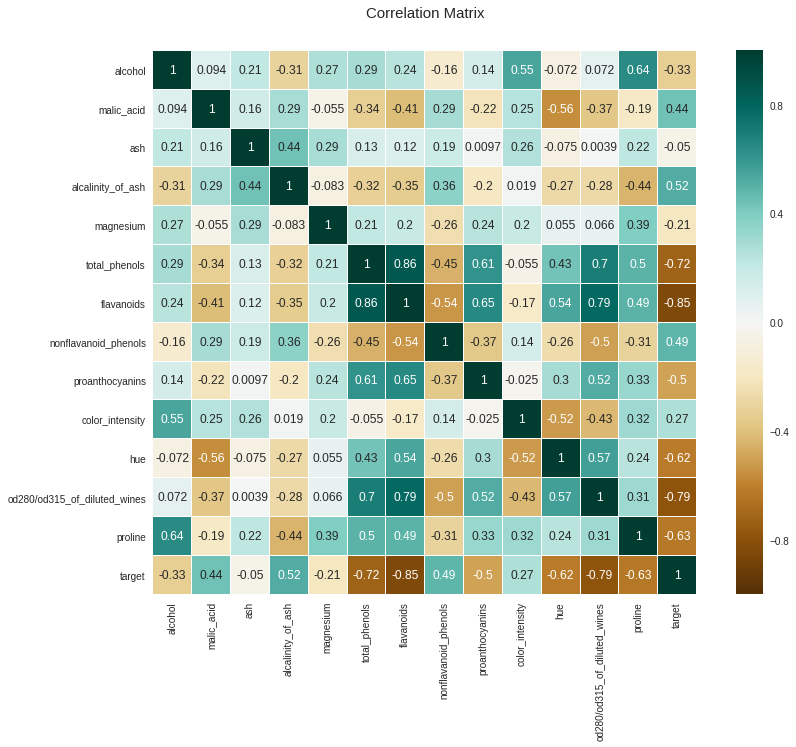

In [6]:
plt.figure(figsize=(14,10))
plt.title('Correlation Matrix', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG",linewidths=0.1, square=True, linecolor='white',annot=True)

In [0]:
train_feats, test_feats, train_labels, test_labels = tts(features, labels, test_size=0.2,random_state=21)
train_feats = scale(train_feats)
test_feats = scale(test_feats)

In [0]:
clf1 = svm.SVC()
clf2 = svm.SVC(kernel='linear')
clf3 = tree.DecisionTreeClassifier()
clf4 = RandomForestClassifier()

In [9]:
# print the details of the Classifier used
print("Using\n", clf1,"\n")
print("Using\n", clf2,"\n")
print("Using\n", clf3,"\n")
print("Using\n", clf4,"\n")

Using
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 

Using
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 

Using
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Using
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=N

In [10]:
# training
clf1.fit(train_feats, train_labels)
clf2.fit(train_feats, train_labels)
clf3.fit(train_feats, train_labels)
clf4.fit(train_feats, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

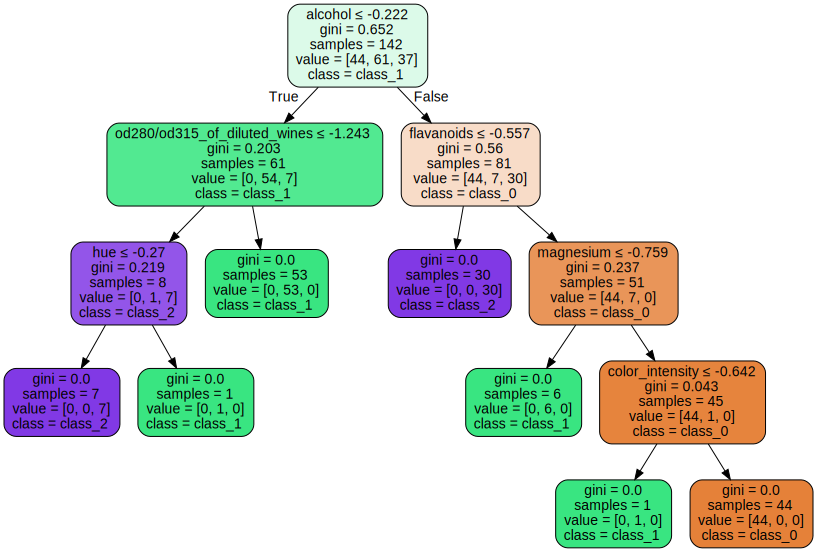

In [11]:
dot_data3 = export_graphviz(clf3, out_file=None,feature_names=wine.feature_names,class_names=wine.target_names,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data3)
graph

In [12]:
# predictions
prediction1 = clf1.predict(test_feats)
print("\nPrediction1:", prediction1)
prediction2 = clf2.predict(test_feats)
print("\nPrediction2:", prediction2)
prediction3 = clf3.predict(test_feats)
print("\nPrediction3:", prediction3)
prediction4 = clf4.predict(test_feats)
print("\nPrediction4:", prediction4)


Prediction1: [0 1 0 2 2 0 0 0 2 0 1 1 2 0 0 2 2 0 2 0 0 2 2 1 1 1 0 0 1 0 1 1 2 1 0 2]

Prediction2: [0 1 1 1 2 0 0 0 2 0 1 1 2 0 0 2 2 0 2 0 0 2 2 1 1 1 0 0 1 0 1 0 2 1 0 2]

Prediction3: [1 1 1 2 2 0 0 0 2 0 1 1 0 0 0 2 1 0 1 0 0 2 1 1 1 1 0 1 1 0 1 2 2 1 0 1]

Prediction4: [0 1 1 2 2 0 0 0 2 0 1 1 2 0 0 2 2 0 2 0 0 2 2 1 1 1 0 0 1 0 1 1 2 1 0 2]


In [13]:
# score = 0
# for i in range(len(prediction1)):
#     if prediction1[i] == test_labels[i]:
#         score += 1
# print("SVC Accuracy:", (score / len(prediction1)) * 100, "%")
# score = 0
# for i in range(len(prediction2)):
#     if prediction2[i] == test_labels[i]:
#         score += 1
# print("Linear Accuracy:", (score / len(prediction2)) * 100, "%")
# score = 0
# for i in range(len(prediction3)):
#     if prediction3[i] == test_labels[i]:
#         score += 1
# print("DecisionTree Accuracy:", (score / len(prediction3)) * 100, "%")
# score = 0
# for i in range(len(prediction4)):
#     if prediction4[i] == test_labels[i]:
#         score += 1
# print("RandomForest Accuracy:", (score / len(prediction4)) * 100, "%")

# Accuracy
print("SVC Accuracy:",accuracy_score(test_labels, prediction1)*100, "%")
print("LinearSVC Accuracy:",accuracy_score(test_labels, prediction2)*100, "%")
print("DecisionTree Accuracy:",accuracy_score(test_labels, prediction3)*100, "%")
print("RandomForest Accuracy:",accuracy_score(test_labels, prediction4)*100, "%")

SVC Accuracy: 100.0 %
LinearSVC Accuracy: 91.66666666666666 %
DecisionTree Accuracy: 75.0 %
RandomForest Accuracy: 97.22222222222221 %


In [14]:
#Classification Report
print("SVC\n",classification_report(test_labels, prediction1))
print("LinearSVC\n",classification_report(test_labels, prediction2))
print("DecisionTree\n",classification_report(test_labels, prediction3))
print("RandomForest\n",classification_report(test_labels, prediction4))

SVC
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

LinearSVC
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.82      0.90      0.86        10
           2       1.00      0.91      0.95        11

   micro avg       0.92      0.92      0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36

DecisionTree
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.56      0.90      0.69        10
           2       0.86      0.55      0.67  